In [63]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

stu_per=pd.read_csv('StudentsPerformance.csv')
stu_per.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 8 entries, gender to writing score
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [64]:
stu_per_copy=stu_per.drop(['lunch','test preparation course'],axis=1,inplace=False)
stu_per_copy.head()


,gender,race/ethnicity,parental level of education,mathscore,reading score,writing score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,NaN,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,NaN,76,78,75


In [65]:
stu_per_copy['parental level of education']=stu_per['parental level of education'].fillna('NOt STUDIED')
stu_per_copy.head()

,gender,race/ethnicity,parental level of education,mathscore,reading score,writing score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,NOt STUDIED,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,NOt STUDIED,76,78,75


In [66]:
stu_per['race/ethnicity']=stu_per['race/ethnicity'].map({ "group A" : "Asian students",
    "group B" : "African students",
    "group C" : "Afro-Asian students",
    "group D" : "American students",
    "group E" : "European students"})
print(stu_per.head())

   gender       race/ethnicity parental level of education         lunch  \
0  female     African students           bachelor's degree      standard   
1  female  Afro-Asian students                         NaN      standard   
2  female     African students             master's degree      standard   
3    male       Asian students          associate's degree  free/reduced   
4    male  Afro-Asian students                         NaN      standard   

  test preparation course  mathscore  reading score  writing score  
0                    none         72             72             74  
1               completed         69             90             88  
2                    none         90             95             93  
3                    none         47             57             44  
4                    none         76             78             75  


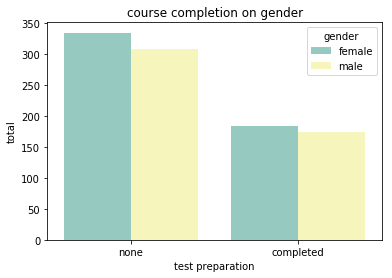

In [71]:
ax=sns.countplot(x='test preparation course',hue='gender',palette='Set3',data=stu_per)
ax.set(title='course completion on gender',xlabel='test preparation',ylabel='total')
plt.show()

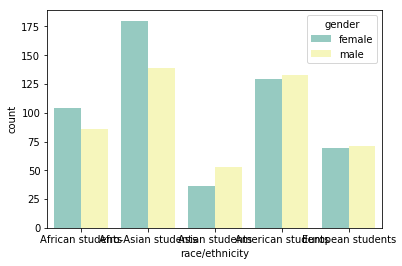

In [73]:
ax=sns.countplot(x='race/ethnicity',hue='gender',palette='Set3',data=stu_per)
plt.show()

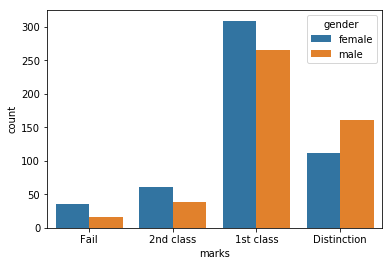

In [78]:
interval=[0,40,50,75,100]
categories=["Fail","2nd class",'1st class','Distinction']
stu_per["marks"]=pd.cut(stu_per.mathscore,interval,labels=categories,right=True,include_lowest=True)
stu_per.head()
ax=sns.countplot(x='marks',hue='gender',data=stu_per)

In [79]:
print(stu_per['mathscore'].mean())

65.969
